In [142]:
%reset
import numpy as np
from numpy.linalg import norm, inv
import time
import math
from correct_final_code_feb24 import *
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import medmnist
from skimage.color import rgb2gray
import torch.utils.data as data
from medmnist import INFO, Evaluator

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


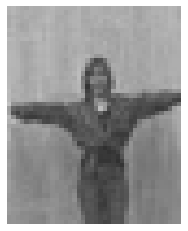

In [143]:
# https://keras.io/examples/vision/3D_image_classification/
# x_train = np.load("x_train_128by128by64.npy")
# print(x_train.shape)

# (140, 128, 128, 64)
# # print("NumPy array: \n", array_rain_fall_npy)
# array_rain_fall = x_train[0:60, :, :]
# np.save("saved-rain-fall-binary.npy", array_rain_fall)


Xread1 = mpimg.imread('input_images/ezgif-frame-004.jpg')
from skimage.color import rgb2gray
X_gray = rgb2gray(Xread1)
X_gray1 = X_gray[40:90, 35:75]
plt.imshow(X_gray1, cmap = 'gray', vmin = -0.163, vmax = 1)
plt.axis('off')
# plt.colorbar()
plt.rcParams.update({'font.size': 28})
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig('result_all_correct_Mar11/Input3D_Action1_Apr11_V3.pdf', bbox_inches='tight')
plt.show()

# X_train = 

In [144]:
X_gray1.shape

(50, 40)

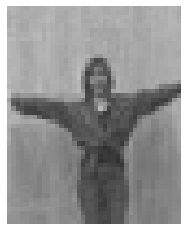

In [145]:

Xread1 = mpimg.imread('input_images/ezgif-frame-005.jpg')
from skimage.color import rgb2gray
X_gray = rgb2gray(Xread1)
X_gray2 = X_gray[40:90, 35:75]
plt.imshow(X_gray2, cmap = 'gray', vmin = -0.163, vmax = 1)
plt.axis('off')
# plt.colorbar()
plt.rcParams.update({'font.size': 28})
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig('result_all_correct_Mar11/Input3D_Action2_Apr11_V3.pdf', bbox_inches='tight')
plt.show()

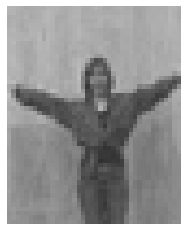

In [146]:

Xread1 = mpimg.imread('input_images/ezgif-frame-006.jpg')
from skimage.color import rgb2gray
X_gray = rgb2gray(Xread1)
X_gray3 = X_gray[40:90, 35:75]
plt.imshow(X_gray3, cmap = 'gray', vmin = -0.163, vmax = 1)
plt.axis('off')
# plt.colorbar()
plt.rcParams.update({'font.size': 28})
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig('result_all_correct_Mar11/Input3D_Action3_Apr11_V3.pdf', bbox_inches='tight')
plt.show()

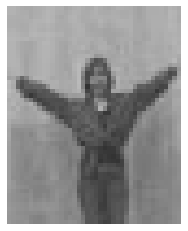

In [147]:

Xread1 = mpimg.imread('input_images/ezgif-frame-007.jpg')
from skimage.color import rgb2gray
X_gray = rgb2gray(Xread1)
X_gray4 = X_gray[40:90, 35:75]
plt.imshow(X_gray4, cmap = 'gray', vmin = -0.163, vmax = 1)
plt.axis('off')
# plt.colorbar()
plt.rcParams.update({'font.size': 28})
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig('result_all_correct_Mar11/Input3D_Action4_Apr11_V3.pdf', bbox_inches='tight')
plt.show()

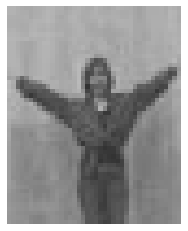

In [148]:

Xread1 = mpimg.imread('input_images/ezgif-frame-008.jpg')
from skimage.color import rgb2gray
X_gray = rgb2gray(Xread1)
X_gray5 = X_gray[40:90, 35:75]
plt.imshow(X_gray4, cmap = 'gray', vmin = -0.163, vmax = 1)
plt.axis('off')
# plt.colorbar()
plt.rcParams.update({'font.size': 28})
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig('result_all_correct_Mar11/Input3D_Action5_Apr11_V3.pdf', bbox_inches='tight')
plt.show()

In [149]:

x_new = np.stack((X_gray1,X_gray2, X_gray3, X_gray4, X_gray5), axis=2, out=None)
print(x_new.shape)

(50, 40, 5)


In [150]:
# x_new = np.squeeze(x)
x_new_pad = np.pad(x_new,((1, 1), (1, 1), (1, 1)), 'constant')
a_input = x_new_pad.flatten()
dim = a_input.shape[0]

In [151]:
dim

15288

In [152]:
kernel_given = np.zeros((3,3,3))
# kernel_given

In [153]:
central_Laplacian = np.array([[0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]])


kernel_given[:,:,0] = -central_Laplacian

kernel_given[:,:,1] = 2*central_Laplacian

kernel_given[:,:,2] = -central_Laplacian



In [154]:
kernel_arr_neg, kernel_arr_pos, kernel_0 = kernel_flatten_3D(x_new_pad, kernel_given)


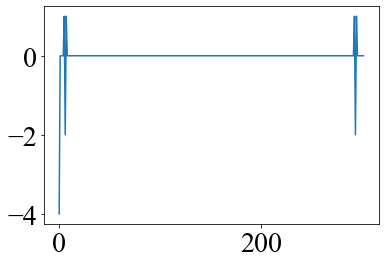

In [155]:
plt.plot(kernel_arr_neg)


In [156]:
in_dim = x_new.shape[0]
t_list = np.linspace(0, 2*np.pi, num=1000, endpoint=True)

result_list = np.zeros(t_list.shape)

# for all the t find the max of this
index_list = np.arange(0, kernel_arr_neg.shape[0],1)+1
for ii, t in enumerate(t_list):
    result_list[ii] = abs(kernel_0 + sum(kernel_arr_neg*np.exp(-1j*index_list*t))+sum(kernel_arr_pos*np.exp(1j*index_list*t)))
norm_fac = max(result_list*1.2)

# norm_fac = 8.781027653077974

print(norm_fac)

37.73572870634337


In [157]:
YDim = int(kernel_arr_neg.shape[0]*1.5)
kappa_pos, kappa_neg, kappa0 = from_S_get_kappa_0718(kernel_arr_pos, kernel_arr_neg,
                                                     kernel_0, norm_fac, YDim)

In [158]:
# kappa is in the unit of gamma_e
A_list, B_list, gamma0 = find_modulate_AmpPha_0718_without_angle(kappa_pos,
                                                                 kappa_neg, kappa0)

In [159]:
alpha_list = np.pi/2*np.ones_like(A_list)
beta_list = np.pi/2*np.ones_like(A_list)

kappa_posBuild, kappa_negBuild, kappa0Build = forward_build_Xvec_0718_without_angle(A_list,
                                                                                    B_list,
                                                                                    gamma0)

In [160]:
kernel_arr_posBuild, kernel_arr_negBuild, kernel_0Build = from_kappa_get_S_0718(kappa_posBuild,
                                                                                kappa_negBuild, 
                                                                                kappa0Build, 
                                                                                norm_fac, YDim)

In [161]:
kernel_big_built = populate_matrix_posNeg(dim, kernel_arr_negBuild, 
                                          kernel_arr_posBuild, kernel_0Build)

In [162]:
gamma_e = np.log(2)/4/np.pi # in the unit of Omega
gamma_e_t_R = gamma_e*2*np.pi

print(gamma0*gamma_e)



(0.10009594061849601-1.5545001028039258e-21j)


/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


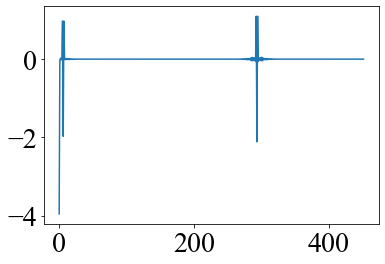

In [163]:
plt.plot(kernel_arr_posBuild)

In [164]:

def passivity_metric(gamma0, B_list, beta_list):
    t_list = np.arange(0, 2*np.pi, 0.01)
    result_list = np.zeros(t_list.shape, dtype = complex)
    
    # for all the t find the max of this
    index_list = np.arange(0, len(B_list),1)+1
    for ii, t in enumerate(t_list):
        result_list[ii] = sum(B_list*np.sin(index_list*t + beta_list))
    constraint = max(result_list)
    return gamma0 > constraint


print(passivity_metric(gamma0, (B_list[:dim]), beta_list[:dim]))
norm_fac

True


37.73572870634337

In [165]:
B_list.shape

(452,)

In [166]:
cut_site1 = 0
cut_site2 = A_list.shape[0]

# result 2

x1_plot = np.arange(0, len(A_list),1)+1

y1_plot = A_list*gamma_e_t_R

x2_plot = np.arange(0, len(A_list[cut_site1:cut_site2]),1)+1 + 0.5

y2_plot = B_list*gamma_e_t_R



# plt.legend(prop={'size': 20})

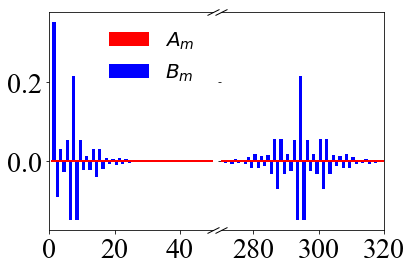

In [186]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.subplots_adjust(wspace=0.05)  # adjust space between axes

# plot the same data on both axes

ax1.bar(x1_plot, y1_plot, fc = 'r', width = 1, label = '$A_m$')
ax1.bar(x2_plot, y2_plot, fc = 'b',  width = 1, label = '$B_m$')
ax1.plot(x1_plot, y1_plot, color='red', linewidth=2)

ax2.bar(x1_plot, y1_plot, fc = 'r', width = 1, label = '$A_m$')
ax2.bar(x2_plot, y2_plot, fc = 'b',  width = 1, label = '$B_m$')
ax2.plot(x1_plot, y1_plot, color='red', linewidth=2)


# zoom-in / limit the view to different portions of the data
ax1.set_xlim(0, 50.)  # outliers only
ax2.set_xlim(270, 320)  # most of the data

# hide the spines between ax and ax2
ax1.spines['right'].set_visible(False)

ax1.tick_params(labelright=False)
ax1.legend(frameon=False, prop={'size': 20})

ax2.spines['left'].set_visible(False)
# ax1.xaxis.tick_top()   # don't put tick labels at the top
ax2.tick_params(labelleft=False)   # don't put tick labels at the top
# ax2.yaxis.tick_left()



d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([1,1], [1, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0,0], [1, 0], transform=ax2.transAxes, **kwargs)

plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rcParams['font.family'] = 'Times New Roman'
# ax0.set_yticks([0, 0.05, 0.1])
plt.rcParams.update({'font.size': 28})

ax1.set_xticks([0, 20, 40])
ax2.set_xticks([280, 300, 320])

plt.savefig('result_all_correct_Mar11/Figure6_Final_Amplitude_x_breakAxis_Apr11_V3.pdf', bbox_inches='tight')

plt.show()

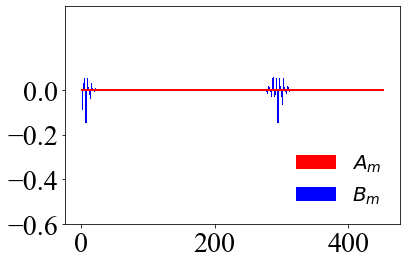

In [169]:
# fig, axs = plt.subplots()
# ax0 = axs
# # result 2
# cut_site = 500
# plt.bar(np.arange(0, len(A_list[:cut_site]),1)+1, A_list[:cut_site]*gamma_e_t_R, fc = 'r', width = 4, label = '$A_m$')
# plt.bar(np.arange(0, len(A_list[:cut_site]),1)+1 + 0.5, B_list[:cut_site]*gamma_e_t_R, fc = 'b',  width = 1, label = '$B_m$')
# plt.plot(np.arange(0, len(A_list[:cut_site]),1)+1, A_list[:cut_site]*gamma_e_t_R, color='red', linewidth=2)

# plt.legend(frameon=False, loc='lower right',prop={'size': 20})

# plt.rc('xtick', labelsize=28)
# plt.rc('ytick', labelsize=28)
# plt.rcParams['font.family'] = 'Times New Roman'
# ax0.set_yticks([0, -0.2, -0.4, -0.6])
# # ax0.set_xticks([1, 26, 52])
# # plt.ylim([-0.8, 1])
# plt.savefig('result_all_correct_Mar11/Figure6_Final_Amplitude_x_breakAxis_Apr11_V3.pdf', bbox_inches='tight')
# plt.show()

In [187]:
B_list.imag

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


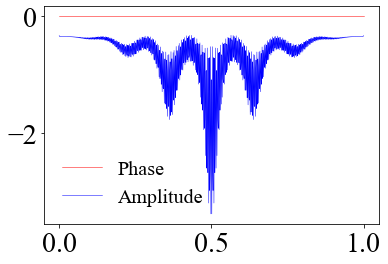

In [188]:

# modulation
t_list = np.linspace(0, 2*np.pi, num=1000, endpoint=True)
amplitude_list = np.zeros(t_list.shape)
phase_list = np.zeros(t_list.shape)

# for all the t find the max of this
index_list = np.arange(0, len(B_list),1)+1
for ii, t in enumerate(t_list):
    
    amplitude_list[ii] = sum(B_list*np.sin(index_list*t + beta_list))
    phase_list[ii] = sum(A_list*np.cos(index_list*t + alpha_list))


# amplitude_list[-1]
# sum(B_list*np.sin(index_list*np.pi*2 + np.pi/2))

fig, axs = plt.subplots()
ax0 = axs

plt.plot(t_list/(2*np.pi), phase_list*gamma_e_t_R,'r',linewidth=0.5, label = 'Phase')
plt.plot(t_list/(2*np.pi), amplitude_list*gamma_e_t_R-gamma0*gamma_e_t_R, 'b',linewidth=0.5, label = 'Amplitude')

plt.legend(frameon=False, loc='lower left', prop={'size': 20})
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
# plt.ylim([-0.35, 0.3])
plt.rcParams['font.family'] = 'Times New Roman'
# ax0.set_yticks([0, 0.05, 0.1])
ax0.set_xticks([0, 0.5, 1])
plt.savefig('result_all_correct_Mar11/Figure6_Final_modulated_form_Apr11_V3.pdf', bbox_inches='tight')
plt.show()


In [189]:
kernel_groundTruth = populate_matrix_posNeg(dim, kernel_arr_neg, 
                                            kernel_arr_pos, kernel_0)

In [190]:
print(np.max(abs(kernel_big_built- kernel_groundTruth)))

0.11440034574106092


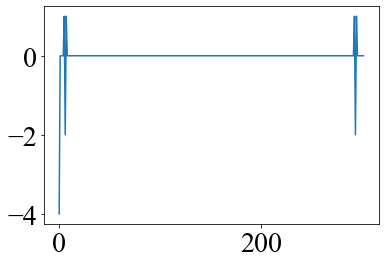

In [191]:
len(kernel_arr_neg)
         
plt.plot(kernel_arr_pos)


In [192]:
kernel_big_built.shape


(15288, 15288)

In [193]:

b_output = kernel_big_built.dot(a_input)
mat_output = b_output.reshape(x_new_pad.shape)
mat_output = mat_output[1:-1,1:-1, 1:-1]

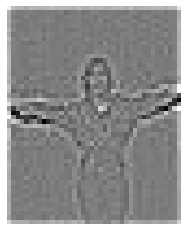

In [194]:

plt.imshow(mat_output.real[:,:,0], cmap = 'gray')
plt.axis('off')
plt.savefig('result_all_correct_Mar11/conv_3D_1_Apr11_V3.pdf', bbox_inches='tight')
plt.show()
# plt.colorbar()


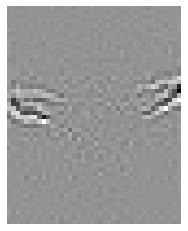

In [195]:
plt.imshow(mat_output.real[:,:,1], cmap = 'gray')
plt.axis('off')
plt.savefig('result_all_correct_Mar11/conv_3D_2_Apr11_V3.pdf', bbox_inches='tight')
plt.show()
# plt.colorbar()


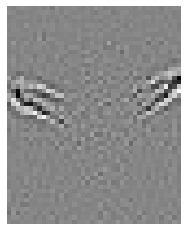

In [196]:
plt.imshow(mat_output.real[:,:,2], cmap = 'gray')
plt.axis('off')
plt.savefig('result_all_correct_Mar11/conv_3D_3_Apr11_V3.pdf', bbox_inches='tight')
plt.show()
# plt.colorbar()

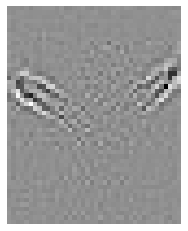

In [197]:
plt.imshow(mat_output.real[:,:,3], cmap = 'gray')
plt.axis('off')
plt.savefig('result_all_correct_Mar11/conv_3D_4_Apr11_V3.pdf', bbox_inches='tight')
plt.show()
# plt.colorbar()

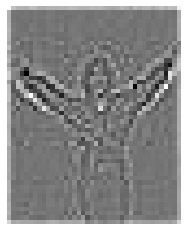

In [198]:
plt.imshow(mat_output.real[:,:,4], cmap = 'gray')
plt.axis('off')
plt.savefig('result_all_correct_Mar11/conv_3D_5_Apr11_V3.pdf', bbox_inches='tight')
plt.show()
# plt.colorbar()